In [5]:
import sympy as sp
import numpy as np
from qutip import *
from mpmath import *
import matplotlib.pyplot as plt


In [191]:
# gamma_0 = 0.1
# lam = 0.5
# #Define s(t) as a hamiltonain coefficient

# t = sp.symbols('t')

# def G(lam,gamma_0):

#     t = sp.symbols('t')
#     l = sp.sqrt(lam**2 - 2*gamma_0*lam)
#     G_t = sp.exp(-lam*t/2) * (sp.cosh(l*t/2) + (lam/l)*sp.sinh(l*t/2))
#     return G_t

# G_t = G(lam,gamma_0)
# #G_t = G(10,0.5)

# G_d = sp.Derivative(G_t,t)
# G_d = G_d.doit()
# #G_d = sp.simplify(G_d)
# Expr = -2*(G_d/G_t)
# Expr = sp.simplify(Expr)

# Expr_num = sp.lambdify(t, Expr, 'numpy')
# Expr_num(10)


0.1106501740323929

In [7]:
lam = 0.05

gamma_0 = 0.2

def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-1*l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression
t = 10
print(Expr(t))
print(np.imag(Expr(t)))
print(np.real(Expr(t)))


# def gam(t):
#     if np.real(Expr(t)) < 0 :
#         return np.sqrt(complex(np.real(Expr(t))))
#     else:
#         return np.sqrt(np.real(Expr(t)))

def gam(t):
    return np.real(Expr(t))

def s(t):
    return np.imag(Expr(t))
    
gam(t)



(0.09093158786535595+0j)
0.0
0.09093158786535595


np.float64(0.09093158786535595)

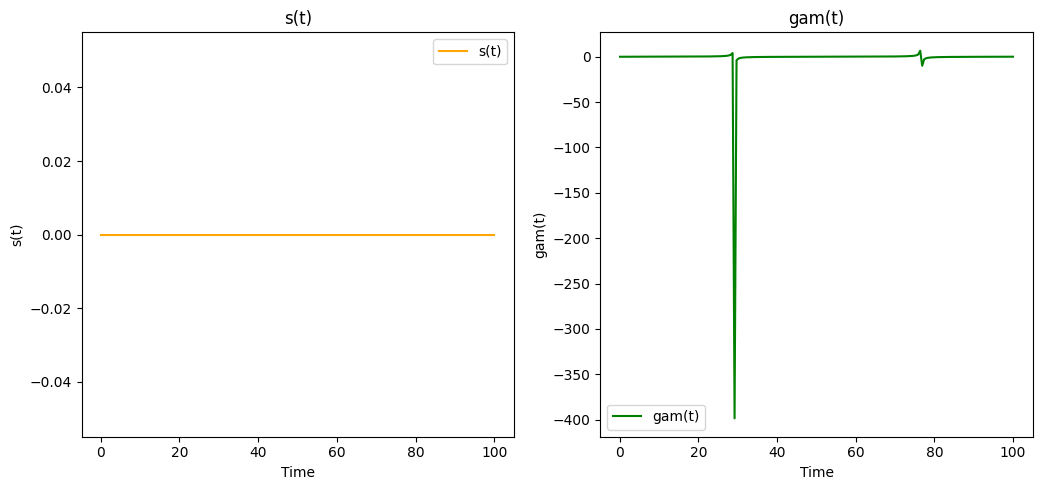

In [8]:

times = np.linspace(0.1, 100, 200)
# Calculate the values of Expr(t), s(t), and gam(t)
expr_values = [Expr(t) for t in times]
s_values = [s(t) for t in times]
gam_values = [gam(t) for t in times]

# Plot Expr(t)
plt.figure(figsize=(15, 5))

# plt.subplot(131)
# plt.plot(times, real_expr_values, label='Real(Expr(t))')
# plt.plot(times, imag_expr_values, label='Imag(Expr(t))')
# plt.xlabel('Time')
# plt.ylabel('Expr(t)')
# plt.legend()
# plt.title('Expr(t)')

# Plot s(t)
plt.subplot(132)
plt.plot(times, s_values, label='s(t)', color='orange')
plt.xlabel('Time')
plt.ylabel('s(t)')
plt.legend()
plt.title('s(t)')

# Plot gam(t)
plt.subplot(133)
plt.plot(times, gam_values, label='gam(t)', color='green')
plt.xlabel('Time')
plt.ylabel('gam(t)')
plt.legend()
plt.title('gam(t)')

plt.tight_layout()
plt.show()

In [9]:
def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression

def s(t):
    return np.imag(Expr(t))

#Define Hamiltonian

H0 = sigmam()*sigmap()

# Define gammma(t)

def gam(t):
    if np.real(Expr(t)) < 0 :
        return np.sqrt(complex(np.real(Expr(t))))
    else:
        return np.sqrt(np.real(Expr(t)))       #np.sqrt(np.real(Expr(t)))

# def gam(t):
#     return np.real(Expr(t))

c_ops = [[sigmap(),gam]]  # time-dependent collapse term

#s(10,args)
times = np.linspace(0.1, 100, 2000)

psi0 = (basis(2, 0) + basis(2, 1)).unit() 


#[[H0,s]]
e_ops = [sigmax(), sigmay(), sigmaz()]

# Increase the nsteps parameter in the Options class
options = Options(store_states=True, nsteps=500000, atol=1e-8, rtol=1e-6)
#[[H0,s]],
result2 = mesolve([[H0,s]], psi0, times, c_ops, e_ops, options = options)


C:\Users\karak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


In [10]:
result2.expect[1]

array([0., 0., 0., ..., 0., 0., 0.])

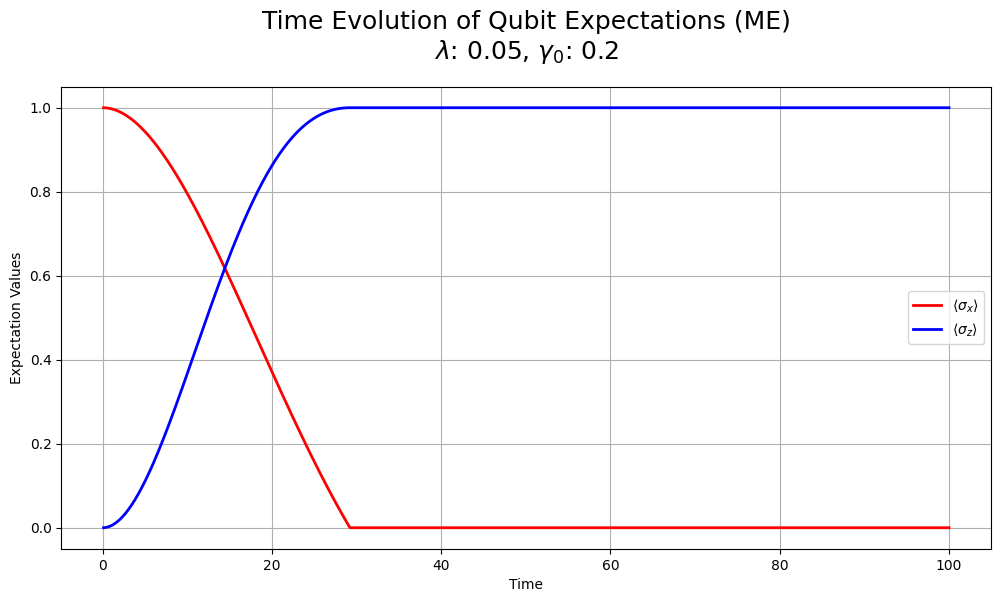

In [11]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(result2.times, result2.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
#ax.plot(result2.times, result2.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')
ax.set_title(f"Time Evolution of Qubit Expectations (ME)\n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
ax.legend()
ax.grid(True)
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cclab1\AppData\Local\Temp\ipykernel_6732\43004076.py:14: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
C:\Users\cclab1\AppData\Local\Temp\ipykernel_6732\43004076.py:14: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)


10.0%. Run time:  17.78s. Est. time left: 00:00:02:40
20.0%. Run time:  36.20s. Est. time left: 00:00:02:24
30.0%. Run time:  54.20s. Est. time left: 00:00:02:06
40.0%. Run time:  72.09s. Est. time left: 00:00:01:48
50.0%. Run time:  89.94s. Est. time left: 00:00:01:29
60.0%. Run time: 107.80s. Est. time left: 00:00:01:11
70.0%. Run time: 125.51s. Est. time left: 00:00:00:53
80.0%. Run time: 143.47s. Est. time left: 00:00:00:35
90.0%. Run time: 161.57s. Est. time left: 00:00:00:17
100.0%. Run time: 179.94s. Est. time left: 00:00:00:00
Total run time: 180.30s


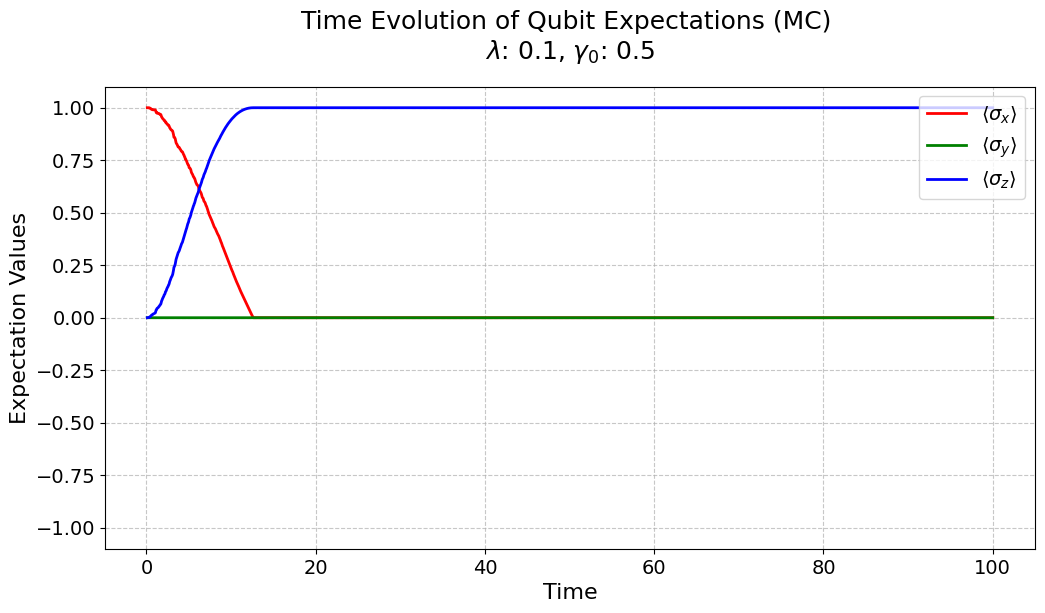

In [210]:
import matplotlib.pyplot as plt

data = mcsolve([[H0,s]], psi0, times, c_ops, e_ops, options = Options(store_states =True))
# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(data.times, data.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(data.times, data.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(data.times, data.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(result2.times, result2.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()
